In [163]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, clone
from sklearn.metrics import r2_score
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge


from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

In [32]:
X,y = fetch_california_housing(return_X_y=True,as_frame=True)

In [33]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

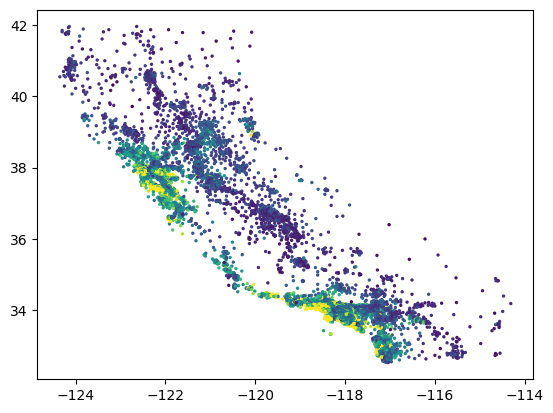

In [35]:
plt.scatter(X['Longitude'],X['Latitude'],s=2,c=y)

In [36]:
Xy = pd.concat([X,y],axis=1)

Xy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [37]:
NS = Xy.groupby(['Latitude']).agg({'MedHouseVal':'mean'})
EW = Xy.groupby(['Longitude']).agg({'MedHouseVal':'mean'})

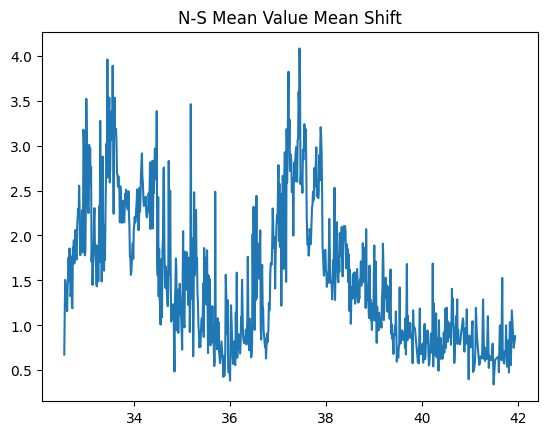

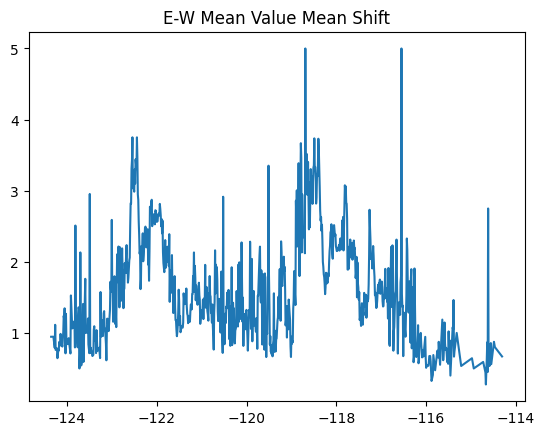

In [38]:
plt.plot(NS['MedHouseVal'])
plt.title("N-S Mean Value Mean Shift")
plt.show()

plt.plot(EW['MedHouseVal'])
plt.title("E-W Mean Value Mean Shift")
plt.show()

In [39]:
#Convolution?


In [46]:
np.convolve([1,2,3,4,5],[1,1,1,-1,-1],mode='same')

array([ 6,  8,  9,  4, -2])

In [113]:
filter_size = 50
vector = np.hstack([
    -np.ones(filter_size),
    np.zeros(filter_size),
    np.ones(filter_size),
    ]
)
vector_consec = np.hstack([
    np.array(list(range(-filter_size,0))),
    np.zeros(filter_size),
    np.array(list(range(0,filter_size))),
    ]
)


vector_alt = np.hstack([
    np.zeros(10),
    np.ones(10),
    np.zeros(10),
    np.ones(10),
    np.zeros(10),
    np.ones(10),
    ]
)


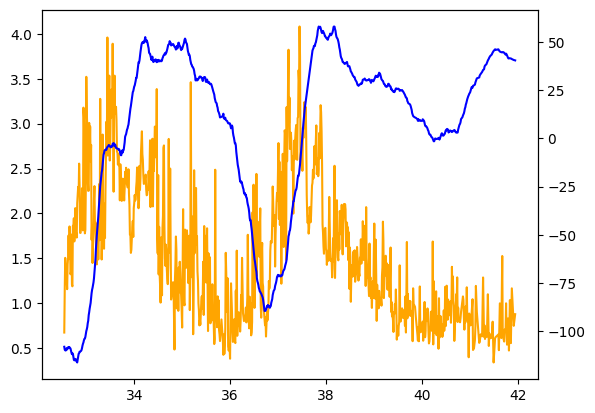

In [107]:
NS_convolution = np.convolve(NS['MedHouseVal'],
            vector,mode='same')
fig,ax1=plt.subplots()
ax1.plot(NS['MedHouseVal'],color='orange')
ax2=ax1.twinx()
ax2.plot(pd.Series(NS_convolution,index=NS.index),color='b')


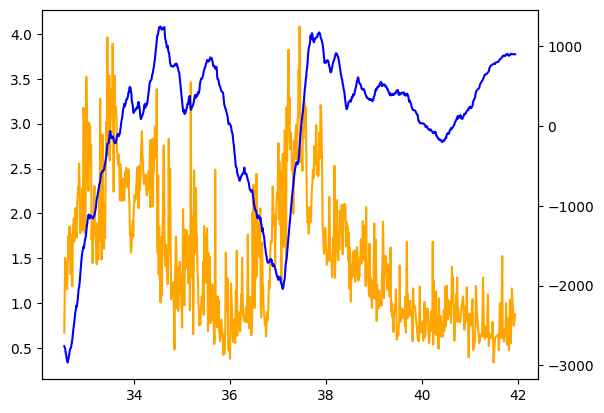

In [104]:
NS_convolution = np.convolve(NS['MedHouseVal'],
            vector_consec,mode='same')
fig,ax1=plt.subplots()
ax1.plot(NS['MedHouseVal'],color='orange')
ax2=ax1.twinx()
ax2.plot(pd.Series(NS_convolution,index=NS.index),color='b')


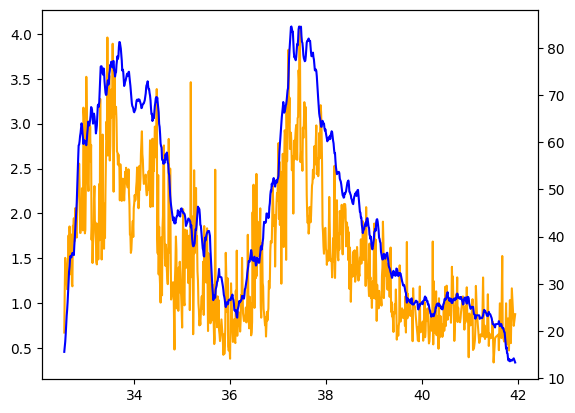

In [114]:
NS_convolution = np.convolve(NS['MedHouseVal'],
            vector_alt,
            mode='same')
fig,ax1=plt.subplots()
ax1.plot(NS['MedHouseVal'],color='orange')
ax2=ax1.twinx()
ax2.plot(pd.Series(NS_convolution,index=NS.index),color='b')


In [115]:
NS['MedHouseVal']

Latitude
32.54    0.675000
32.55    1.154667
32.56    1.506000
32.57    1.313278
32.58    1.380885
           ...   
41.84    1.036000
41.86    0.557333
41.88    1.167000
41.92    0.750000
41.95    0.879500
Name: MedHouseVal, Length: 862, dtype: float64

In [129]:
window = 30
labels = np.hstack([
    np.ones(window+1),
    -np.ones(window)
])
scores = []


idx=0
for i in range(len(NS)-2*window):
    segment = NS['MedHouseVal'].values[idx:window*2+1+idx]

    score = silhouette_samples(segment.reshape(len(segment),1),labels)[window+1]
    scores.append(score)
    idx+=1

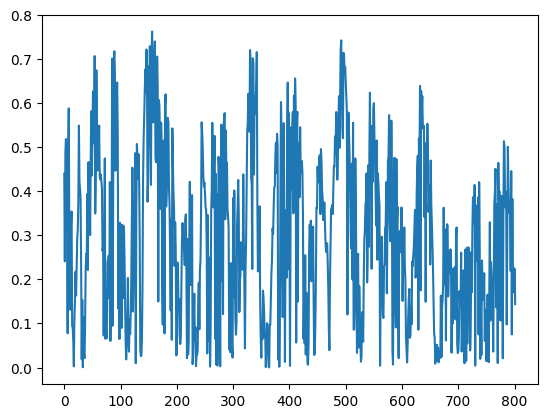

In [133]:
plt.plot(abs(np.array(scores)))

In [134]:
#Rolling Variance?

In [140]:
NSvar = (NS['MedHouseVal'] - NS['MedHouseVal'].rolling(window=10,center=True).mean())**2

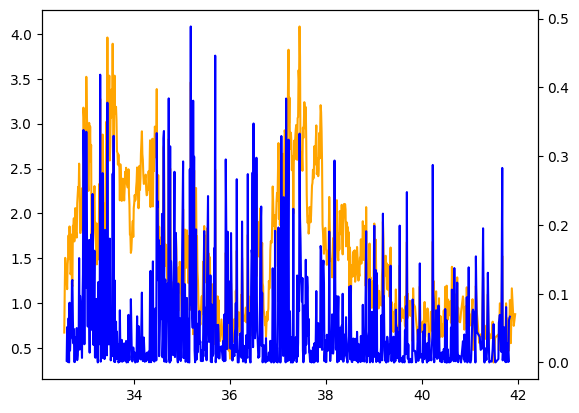

In [149]:
NS_convolution = np.convolve(NS['MedHouseVal'],
            vector_alt,
            mode='same')
fig,ax1=plt.subplots()
ax1.plot(NS['MedHouseVal'],color='orange')
ax2=ax1.twinx()
ax2.plot(np.log(np.log(np.log(np.log(NSvar+1)+1)+1)+1),color='b')

In [150]:
def deep_log_1p(a,n=3):

    a_prime = a
    for i in range(n):
        a_prime = np.log(a_prime+1)

    return a_prime

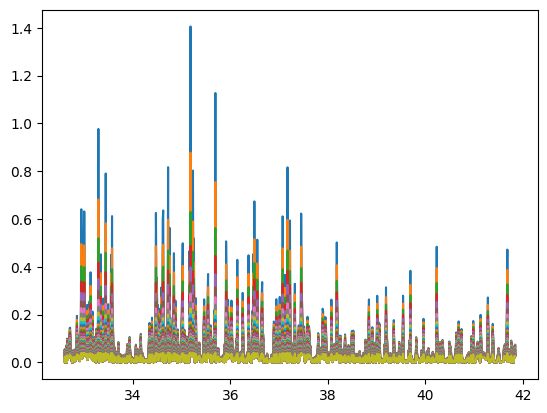

In [155]:

for i in range(1,50):
    plt.plot(deep_log_1p(NSvar,i))


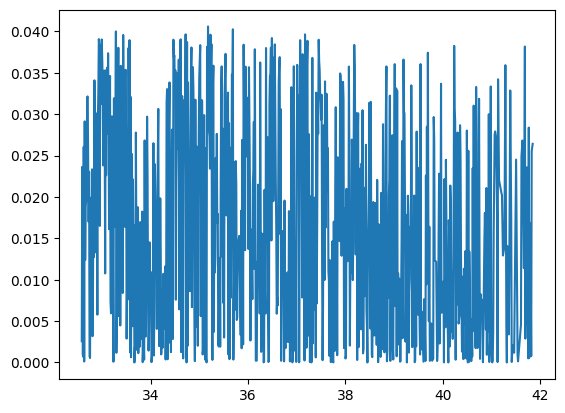

In [157]:
plt.plot(deep_log_1p(NSvar,50))

c:\Users\Jason\Desktop\git_control\ml-research\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.7284e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


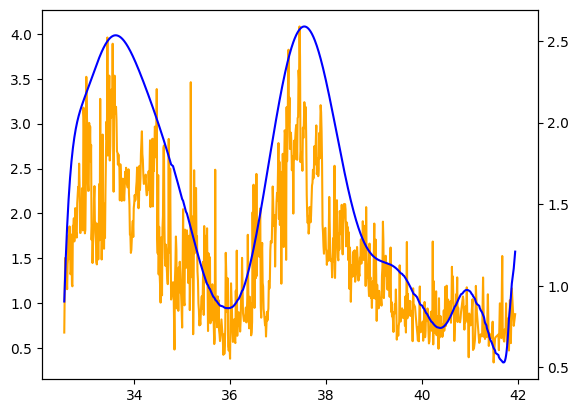

In [191]:
#Spline Transformer

spline=SplineTransformer(degree=3,n_knots=4)
Xlinear = np.linspace(0,10,len(NS['MedHouseVal']))
Xlinear = Xlinear[:, np.newaxis]
NSspline = spline.fit_transform(Xlinear)


pipe = Pipeline(steps=[
    ('spline',SplineTransformer(degree=10,n_knots=5)),
    ('learner',Ridge(alpha=0))
]).fit(Xlinear,NS['MedHouseVal'])
y_plot = pipe.predict(Xlinear)

fig,ax1=plt.subplots()
ax1.plot(NS['MedHouseVal'],color='orange')
ax2=ax1.twinx()
ax2.plot(pd.Series(y_plot,index=NS.index),color='b')


In [186]:
pipe.predict([[2000]])

array([0.81460977])

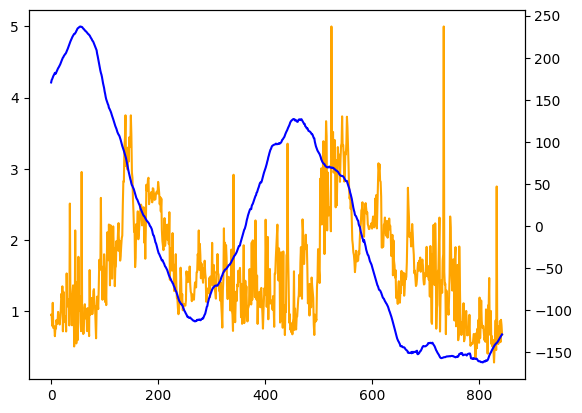

In [74]:
EW_convolution = np.convolve(EW['MedHouseVal'],
            vector,mode='same')
fig,ax1=plt.subplots()
ax1.plot(EW['MedHouseVal'].values,color='orange')
ax2=ax1.twinx()
ax2.plot(EW_convolution,color='b')
